# Model Building ARIMA

Since clustering cannot be performed with the given data, we going with the time series forecasting with ARIMA for dependent variable 
"Often not enough to eat" and also for independent variable "New Covid Cases".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
food_covid_df = pd.read_csv('food_covid_cleaned.csv')

/tmp/ipykernel_1109833/791110171.py:1: DtypeWarning: Columns (9,13,15,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  food_covid_df = pd.read_csv('food_covid_cleaned.csv')


In [3]:
food_covid_df.tail()

,Enough of the kinds of food wanted,"Enough Food, but not always the kinds wanted",Sometimes not enough to eat,Often not enough to eat,Age,Sex_At_Birth,Race,Education,Marital_Status,Children_Present,...,Active_Duty,House_Receives_SNAP,Used_To_Meet_Needs,Provider_Of_Free_Groceries,Freq_Feel_Depressed,Freq_Feel_Anxious,Year,week_name,Week,New Covid Cases
176928,8232974.0,2995989.0,1063910.0,220412.0,NaN,Female,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,April 28 - May 10,week29,6352.0
176929,5065088.0,2262290.0,992854.0,292280.0,NaN,NaN,Hispanic or Latino (may be of any race),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,April 28 - May 10,week29,6352.0
176930,7533599.0,1651044.0,517927.0,206844.0,NaN,NaN,"White alone, not Hispanic",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,April 28 - May 10,week29,6352.0
176931,789593.0,387487.0,150796.0,87343.0,NaN,NaN,"Black alone, not Hispanic",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,April 28 - May 10,week29,6352.0
176932,2859494.0,817139.0,123871.0,21680.0,NaN,NaN,"Asian alone, not Hispanic",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,April 28 - May 10,week29,6352.0


In [4]:
food_covid_df.shape

(176933, 30)

In [4]:
food_covid_df['Location'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [5]:
food_covid_df.columns

Index(['Enough of the kinds of food wanted',
       'Enough Food, but not always the kinds wanted',
       'Sometimes not enough to eat', 'Often not enough to eat', 'Age',
       'Sex_At_Birth', 'Race', 'Education', 'Marital_Status',
       'Children_Present', 'Unemployed_Last_4', 'Employed_Last_7',
       'Reason_Not_Working', 'Receiving_Pay_No_Work', 'Income',
       'Health_Status', 'Covered_By_Insurance', 'Caught_Up_On_Mortgage',
       'Location', 'Household_Size', 'Active_Duty', 'House_Receives_SNAP',
       'Used_To_Meet_Needs', 'Provider_Of_Free_Groceries',
       'Freq_Feel_Depressed', 'Freq_Feel_Anxious', 'Year', 'week_name', 'Week',
       'New Covid Cases'],
      dtype='object')

In [6]:
food_covid_df['Age'].unique()

array(['18 - 24', '25 - 39', '40 - 54', '55 - 64', '65 and above', nan],
      dtype=object)

In [7]:
food_covid_df['Race'].unique()

array([nan, 'Hispanic or Latino (may be of any race)',
       'White alone, not Hispanic', 'Black alone, not Hispanic',
       'Asian alone, not Hispanic',
       'Two or more races + Other races, not Hispanic'], dtype=object)

In [8]:
food_covid_df['Education'].unique()

array([nan, 'Less than high school', 'High school or GED',
       'Some college/associate’s degree', 'Bachelor’s degree or higher'],
      dtype=object)

In [14]:
food_covid_df['Marital_Status'].unique()

array([nan, 'Married', 'Widowed', 'Divorced/separated', 'Never married',
       'Did not report'], dtype=object)

In [15]:
food_covid_df['Week'].unique()

array(['week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7',
       'week8', 'week9', 'week10', 'week11', 'week12', 'week13', 'week14',
       'week15', 'week16', 'week17', 'week18', 'week19', 'week20',
       'week21', 'week22', 'week23', 'week24', 'week25', 'week26',
       'week27', 'week28', 'week29'], dtype=object)

### Forecasting the Often not enough to eat for USA for the people whose age between '55-64'

In [90]:
food_df = pd.read_csv('Final_Pulse_Data.csv')

/tmp/ipykernel_935632/1578432957.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  food_df = pd.read_csv('Final_Pulse_Data.csv')


In [102]:
X_age_us = food_df[(food_df['Location']=='US')&(food_df['Age']=='55 - 64')]['Often not enough to eat'].values

In [103]:
X_age_us.shape

(37,)

### Auto Arima Forecast

In [104]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model_us_food = pm.auto_arima(X_age_us, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=967.443, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=986.450, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=969.357, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=966.299, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=984.540, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=963.187, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=968.209, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept
Total fit time: 2.001 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1433
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -14778.199
Date:

### Interpret the residual plots

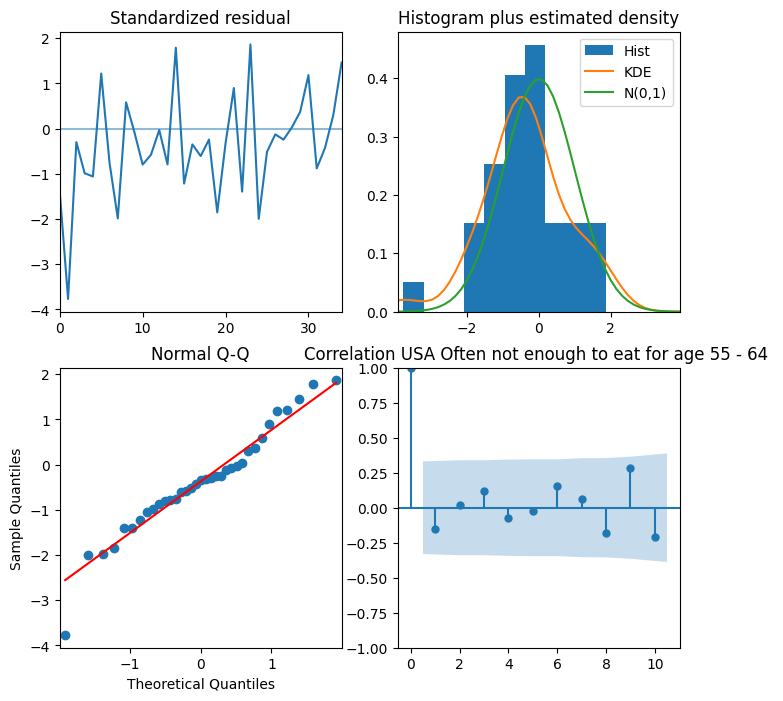

In [105]:
model_us_food.plot_diagnostics(figsize=(8,8))
plt.title('Correlation USA Often not enough to eat for age 55 - 64 ')
plt.show()

In the normal Q-Q plot, All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed. Overall it seems to be a good fit

### Let's Forecast

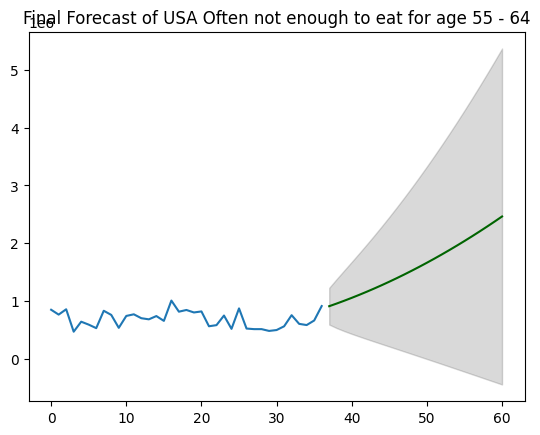

In [106]:
# Forecast
n_periods = 24
fc, confint = model_us_food.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X_age_us), len(X_age_us)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X_age_us)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of USA Often not enough to eat for age 55 - 64")
plt.show()

### Forecasting the Covid cases for the all the states for the next week

In [107]:
modified_food_covid_df = food_covid_df[['Week','New Covid Cases']]

In [108]:
x = modified_food_covid_df.groupby(['Week']).mean().reset_index()

In [109]:
x_values = x['New Covid Cases'].values

In [110]:
x_values.shape

(29,)

### Auto Arima Forecast

In [111]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(x_values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=586.834, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=586.447, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=584.316, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=585.710, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=584.620, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=587.407, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=589.392, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=582.459, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=585.487, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=585.005, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=583.819, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.648 seconds
                               SARIMAX Results                                
Dep. Variable:           

### Interpret the residual plots

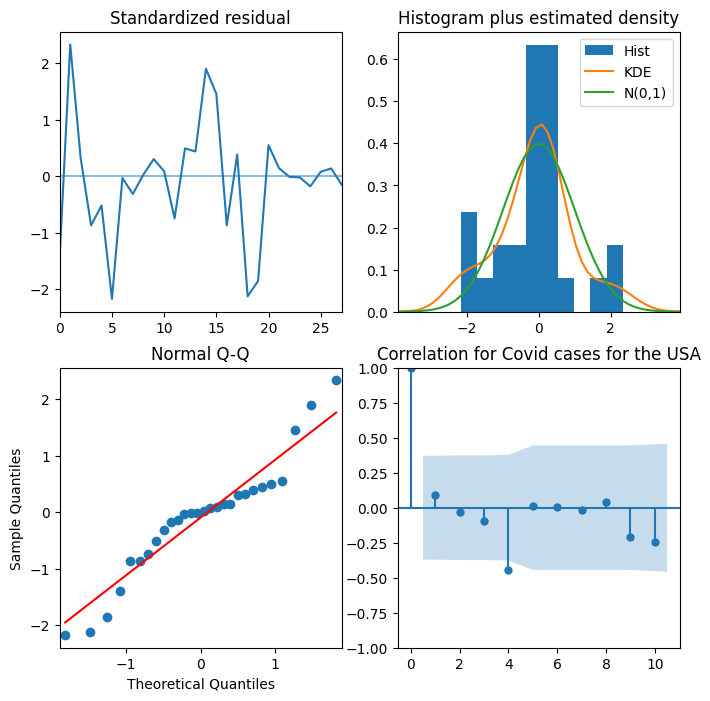

In [115]:
model.plot_diagnostics(figsize=(8,8))
plt.title('Correlation for Covid cases for the USA')
plt.show()

In the normal Q-Q plot, All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed. Overall it seems to be a good fit

### Let's Forecast

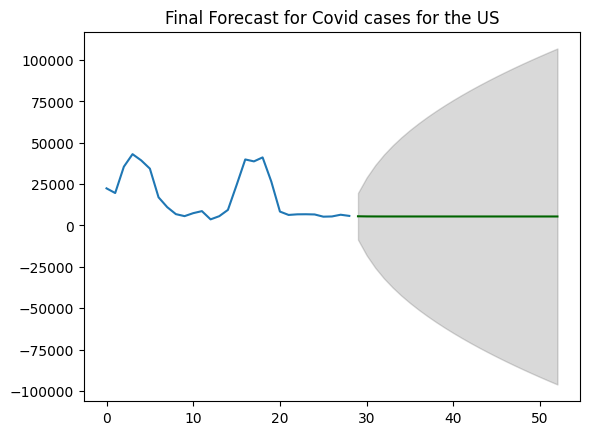

In [114]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(x_values), len(x_values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(x_values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast for Covid cases for the US")
plt.show()

Don't have the enough data to time series data